In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv("train_titanic.csv")
test_titanic = pd.read_csv("test_titanic.csv")

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
# Age column의 경우는 null값이 그렇게 많지 않다 -> 평균 값으로 fill
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
test_titanic["Age"].fillna(titanic_df["Age"].mean(), inplace = True)

In [6]:
titanic_df["Cabin"].value_counts() # cabin의 데이터 형태 체크

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
# 좌석 역시도 생존 여부에 영향을 미칠 수도 있다
titanic_df["Cabin"].fillna("N", inplace = True)
test_titanic["Cabin"].fillna("N", inplace = True)

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [9]:
# Ticket, Name, PassengerId 모두 쓸모없는 column이다
titanic_df.drop(["PassengerId", "Ticket", "Name"], axis = 1, inplace = True)
test_titanic.drop(["PassengerId", "Ticket", "Name"], axis = 1, inplace = True)

In [10]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [11]:
# cabin 데이터 셋을 바꿔준다
len(titanic_df)

891

In [12]:
# object형 데이터의 경우는 .str[] 메서드로 데이터 추출 및 변경 가능
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
test_titanic["Cabin"] = test_titanic["Cabin"].str[:1]

In [13]:
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [14]:
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic_df["Embarked"].fillna("N", inplace = True)
test_titanic["Embarked"].fillna("N", inplace = True)

In [16]:
# 인코딩이 필요한 column 모아둔다
enc_c = ["Sex", "Cabin", "Embarked"]

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
def l_enc(enc_c):
    for i in enc_c:
        enc.fit(titanic_df[i])
        titanic_df[i] = enc.transform(titanic_df[i])
        test_titanic[i] = enc.transform(test_titanic[i])
l_enc(enc_c)


In [18]:
titanic_df["Cabin"].value_counts()

7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: Cabin, dtype: int64

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


<AxesSubplot:>

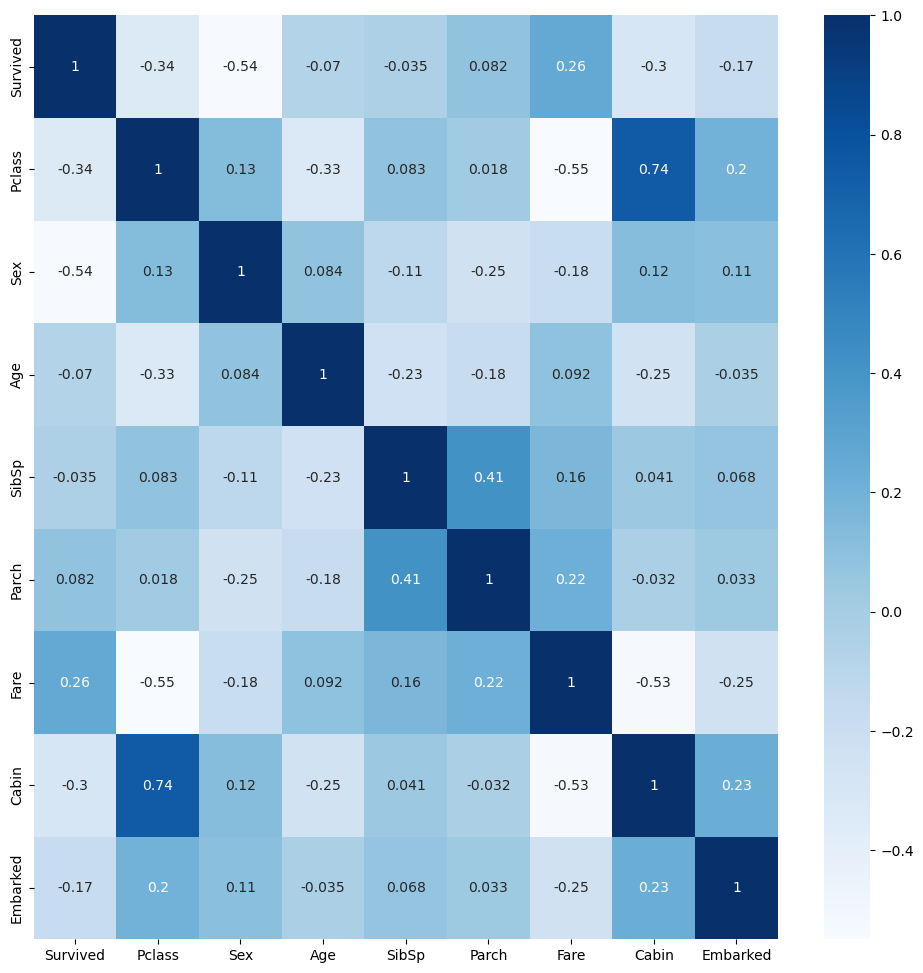

In [20]:
plt.figure(figsize = (12, 12))
sns.heatmap(data = titanic_df.corr(), cmap = "Blues", annot = True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

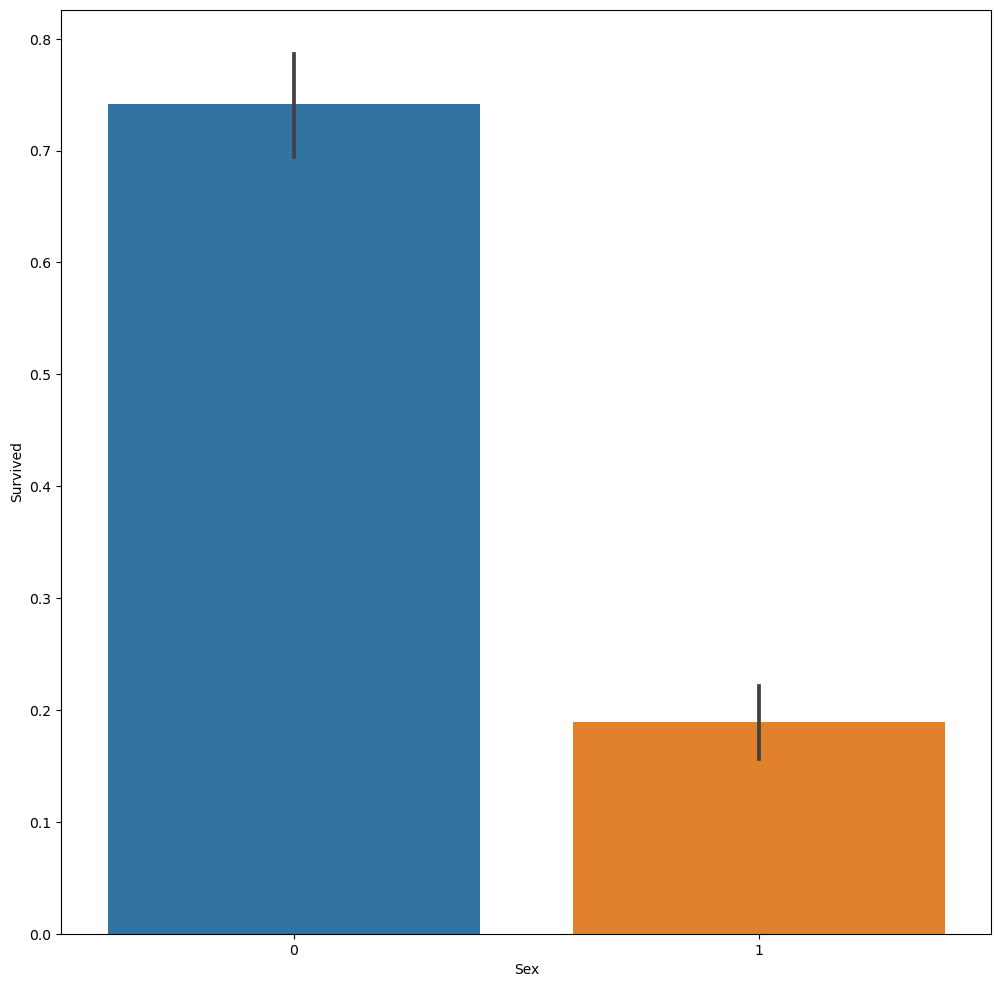

In [21]:
# Sex와 Survived와의 상관관계
plt.figure(figsize = (12, 12))
sns.barplot(data = titanic_df, x = "Sex", y = "Survived")

In [22]:
titanic_df["Sex"].value_counts()
# male: 1, female: 0 -> barplot 결가 male의 생존 확률이 매우 낮음을 파악 가능하다.

1    577
0    314
Name: Sex, dtype: int64

In [23]:
# Age 변수의 경우 연속형 변수이기에 난잡하다
# 나이대 별로 분류해둔 column을 하나 형성한다
def set_new(x):
    if x < 0:
        return 'n'
    elif x <= 5:
        return "a"
    elif x <= 12:
        return "b"
    elif x <= 18:
        return "c"
    elif x <= 25:
        return 'd'
    elif x <= 35:
        return "e"
    else:
        return "f"
titanic_df["Age_range"] = titanic_df["Age"].apply(lambda x : set_new(x))

In [24]:
titanic_df["Age_range"].value_counts()

e    373
f    217
d    162
c     70
a     44
b     25
Name: Age_range, dtype: int64

In [25]:
enc.fit(titanic_df["Age_range"])
titanic_df["Age_range"] = enc.transform(titanic_df["Age_range"])

In [26]:
titanic_df["Age_range"].value_counts()

4    373
5    217
3    162
2     70
0     44
1     25
Name: Age_range, dtype: int64

<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

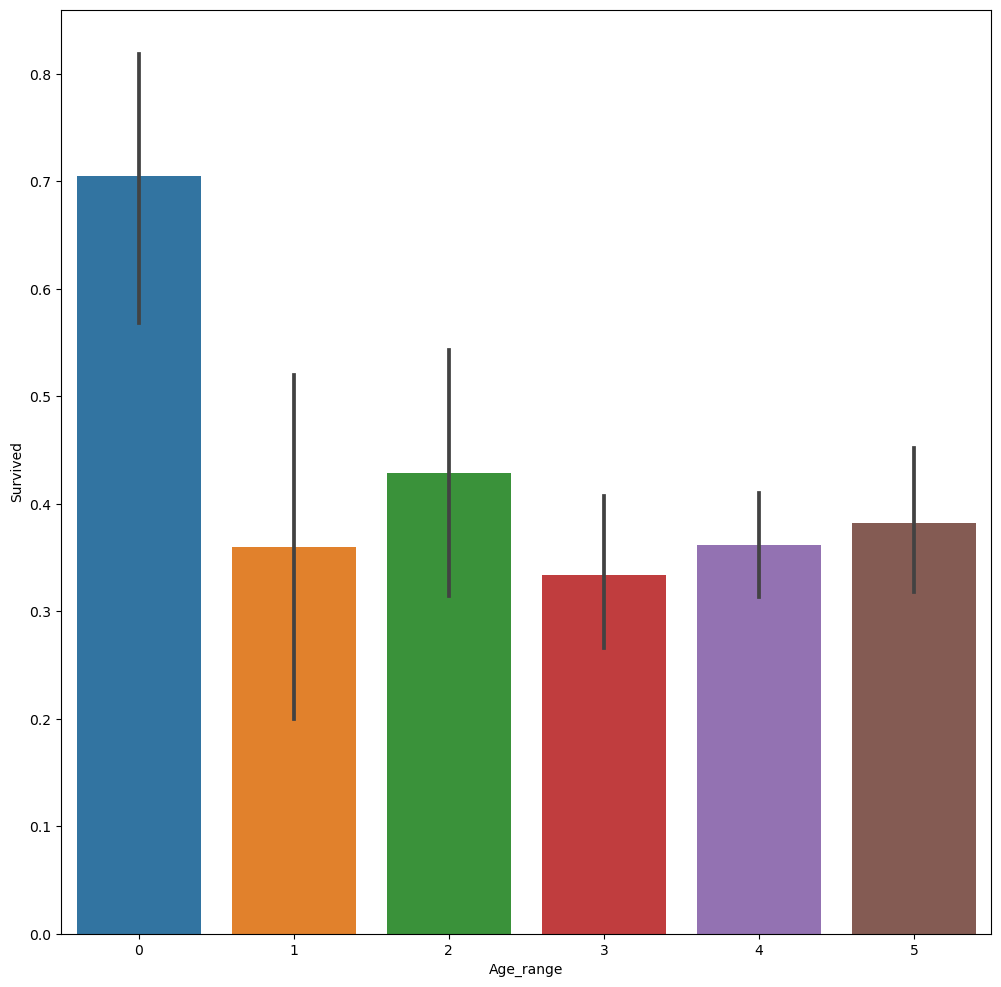

In [27]:
plt.figure(figsize = (12, 12))
sns.barplot(data = titanic_df, x = "Age_range", y = "Survived")

<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

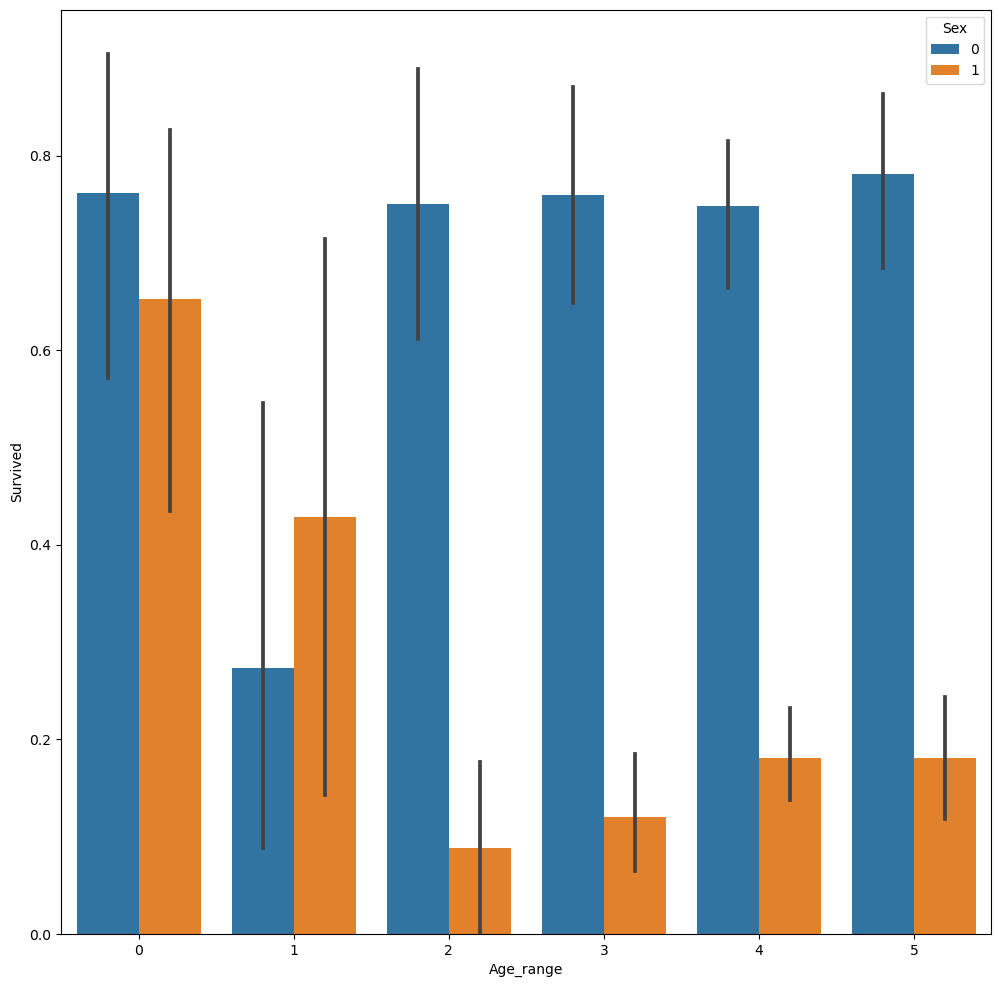

In [28]:
plt.figure(figsize = (12, 12))
sns.barplot(data = titanic_df, x = "Age_range", y = "Survived", hue = "Sex")

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

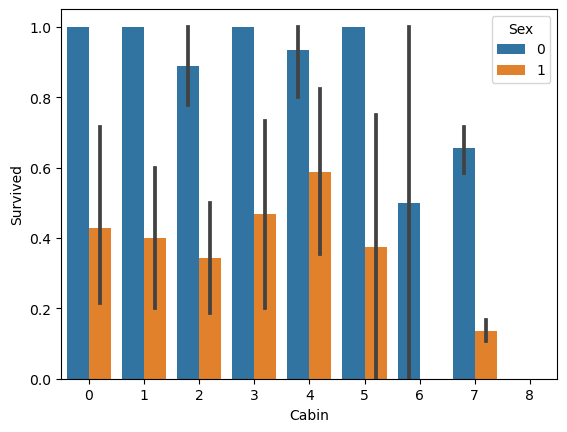

In [29]:
sns.barplot(data = titanic_df, x = "Cabin", y = "Survived", hue = "Sex")

In [30]:
titanic_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
Age_range    0
dtype: int64

In [31]:
titanic_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
X_titanic_df = titanic_df.drop(["Survived", "Age_range"], axis = 1)
y_titanic_df = titanic_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 42)

In [33]:
dt_c = DecisionTreeClassifier(random_state=42)
rf_c = RandomForestClassifier(random_state=42)
lr_c = LogisticRegression(solver = "liblinear")

In [34]:
score_dt = cross_val_score(dt_c, X_train.values, y_train, scoring="accuracy", cv = 5)
score_rf = cross_val_score(dt_c, X_train.values, y_train, scoring="accuracy", cv = 5)
score_lr = cross_val_score(dt_c, X_train.values, y_train, scoring="accuracy", cv = 5)

In [35]:
res = [np.mean(score_dt), np.mean(score_rf), np.mean(score_lr)]

In [36]:
res

[0.7739781345415148, 0.7739781345415148, 0.7739781345415148]

In [37]:
from sklearn.metrics import accuracy_score
dt_c.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
test_titanic["Fare"].fillna(0, inplace=True)

In [39]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int32  
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 21.4 KB


In [40]:
y_pred = dt_c.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [41]:
dt_c.score(X_test, y_test)

0.770949720670391

In [42]:
accuracy_score(y_test, y_pred)

0.770949720670391

In [43]:
lr_c.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [44]:
y_pred = lr_c.predict(X_test)

In [45]:
y_pred = lr_c.predict(test_titanic)

In [46]:
len(y_pred)

418

In [47]:
submission = pd.read_csv("submission.csv")
submission["Survived"] = y_pred
submission.to_csv("result.csv", index = False)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion, accuracy, precision, recall)

pred = lr_c.predict(X_test)
get_clf_eval(y_test, pred)

[[90 15]
 [22 52]] 0.7932960893854749 0.7761194029850746 0.7027027027027027


In [49]:
pred_proba = lr_c.predict_proba(X_test)

In [50]:
pred_proba.shape

(179, 2)

In [51]:
# precision / recall trade off
pred_proba_res = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)

In [52]:
pred_proba_res

array([[0.88333141, 0.11666859, 0.        ],
       [0.79427697, 0.20572303, 0.        ],
       [0.85193291, 0.14806709, 0.        ],
       [0.16424831, 0.83575169, 1.        ],
       [0.29991286, 0.70008714, 1.        ],
       [0.10442995, 0.89557005, 1.        ],
       [0.3549286 , 0.6450714 , 1.        ],
       [0.89767107, 0.10232893, 0.        ],
       [0.29268329, 0.70731671, 1.        ],
       [0.11875763, 0.88124237, 1.        ],
       [0.67326593, 0.32673407, 0.        ],
       [0.90451724, 0.09548276, 0.        ],
       [0.58559422, 0.41440578, 0.        ],
       [0.84368414, 0.15631586, 0.        ],
       [0.80893727, 0.19106273, 0.        ],
       [0.09667176, 0.90332824, 1.        ],
       [0.70517785, 0.29482215, 0.        ],
       [0.35484314, 0.64515686, 1.        ],
       [0.77832272, 0.22167728, 0.        ],
       [0.65924976, 0.34075024, 0.        ],
       [0.86214016, 0.13785984, 0.        ],
       [0.67305881, 0.32694119, 0.        ],
       [0.

In [53]:
# Binarizer 활용하여 predict_proba를 predict 결과로 변환
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]
# binarizer의 threshold 기준값보다 작거나 같으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [54]:
# pred 메서드 구현
custom_threshold = 0.5
pred_proba1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold)
binarizer.fit(pred_proba1)
custom_pred = binarizer.transform(pred_proba1)

In [55]:
get_clf_eval(y_test, custom_pred)

# 결론적으로 직접 만든 메서드와 sklearn의 pred 메서드 구현 방식이 같음을 알 수 있다

[[90 15]
 [22 52]] 0.7932960893854749 0.7761194029850746 0.7027027027027027


In [56]:
# pred 메서드 구현
custom_threshold = 0.4
pred_proba1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold)
binarizer.fit(pred_proba1)
custom_pred = binarizer.transform(pred_proba1)

In [57]:
get_clf_eval(y_test, custom_pred)
# 재현율이 올라갔음을 알 수 있다. threshold 값을 낮춘 경우

[[85 20]
 [17 57]] 0.7932960893854749 0.7402597402597403 0.7702702702702703


In [58]:
len(pred_proba)

179

In [59]:
pred_res = lr_c.predict_proba(test_titanic)

In [60]:
pred_res = pred_res[:, 1]

In [61]:
pred_res

array([0.12345107, 0.46656882, 0.12922975, 0.13102034, 0.57559117,
       0.16535459, 0.64350662, 0.17621065, 0.73532851, 0.09564081,
       0.12436565, 0.27403503, 0.90081271, 0.09799709, 0.81459474,
       0.79133372, 0.20855869, 0.18261971, 0.57112364, 0.6130629 ,
       0.26795626, 0.1611434 , 0.86409258, 0.47039562, 0.92354258,
       0.06792027, 0.92934326, 0.17800851, 0.36552597, 0.10303284,
       0.12463204, 0.15992572, 0.50216514, 0.52270166, 0.43039622,
       0.19051327, 0.6241289 , 0.66617598, 0.1362938 , 0.15152738,
       0.12452975, 0.38638127, 0.10092417, 0.75764062, 0.82107215,
       0.13542234, 0.41018832, 0.1346259 , 0.86703237, 0.54994624,
       0.39649932, 0.27466274, 0.67615735, 0.89534326, 0.26412031,
       0.07166558, 0.11284731, 0.14552783, 0.10071705, 0.96565012,
       0.15609442, 0.20463672, 0.15328479, 0.68080397, 0.64369806,
       0.76562135, 0.69875918, 0.28541597, 0.4594675 , 0.86065918,
       0.67172263, 0.14544536, 0.62739635, 0.46086856, 0.95583

In [62]:
custom_threshold = 0.4
pred_res1 = pred_res.reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold)
binarizer.fit(pred_res1)
custom_res = binarizer.transform(pred_res1)

In [63]:
custom_res.reshape(-1)

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [64]:
submission = pd.read_csv("submission.csv")
submission["Survived"] = y_pred
submission.to_csv("result.csv", index = False)

In [69]:
from sklearn.ensemble import RandomForestClassifier

params = {"n_estimators": [100, 150, 200], "max_depth" : [15, 20, 25], "min_samples_split":[2, 3, 4], "max_features": [5, 6]}
rftree = GridSearchCV(rf_c, param_grid=params, cv = 5, refit=True, return_train_score=True)

In [70]:
rftree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25], 'max_features': [5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True)

In [71]:
est = rftree.best_estimator_

In [72]:
est.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=15, max_features=6, min_samples_split=4,
                       n_estimators=200, random_state=42)>

In [76]:
pd.DataFrame(rftree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.488097,0.048216,0.035123,0.003299,15,5,2,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.797203,...,0.807633,0.021601,31,0.978910,0.989455,0.989474,0.982456,0.982456,0.984550,0.004216
1,0.614368,0.062709,0.042492,0.001623,15,5,2,150,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.804196,...,0.809032,0.022904,22,0.980668,0.989455,0.989474,0.980702,0.982456,0.984551,0.004064
2,0.725668,0.037634,0.063430,0.017920,15,5,2,200,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.804196,...,0.807643,0.024885,30,0.982425,0.989455,0.989474,0.980702,0.980702,0.984552,0.004060
3,0.374214,0.073762,0.027912,0.006318,15,5,3,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.804196,...,0.811849,0.022394,11,0.968366,0.978910,0.973684,0.964912,0.968421,0.970859,0.004906
4,0.443835,0.035950,0.032102,0.002978,15,5,3,150,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.818182,...,0.811819,0.015995,12,0.968366,0.984183,0.978947,0.973684,0.971930,0.975422,0.005553
5,0.587024,0.047640,0.041895,0.002528,15,5,3,200,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.818182,...,0.814636,0.016630,5,0.971880,0.985940,0.973684,0.971930,0.977193,0.976126,0.005274
6,0.269686,0.017304,0.022327,0.005262,15,5,4,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.804196,...,0.817443,0.014392,3,0.952548,0.968366,0.959649,0.959649,0.950877,0.958218,0.006215
7,0.394148,0.016369,0.028317,0.003496,15,5,4,150,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.818182,...,0.811809,0.011886,15,0.957821,0.964851,0.957895,0.957895,0.954386,0.958569,0.003418
8,0.539964,0.034360,0.039688,0.006358,15,5,4,200,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.818182,...,0.806185,0.019111,42,0.959578,0.968366,0.954386,0.957895,0.956140,0.959273,0.004865
9,0.352998,0.064853,0.032172,0.017649,15,6,2,100,"{'max_depth': 15, 'max_features': 6, 'min_samp...",0.790210,...,0.794997,0.025243,52,0.978910,0.989455,0.989474,0.985965,0.980702,0.984901,0.004389


In [79]:
ans = est.predict(test_titanic)

In [80]:
submission = pd.read_csv("submission.csv")
submission["Survived"] = ans
submission.to_csv("result.csv", index = False)

In [82]:
submission.value_counts()

PassengerId  Survived
892          0           1
1205         1           1
1177         0           1
1176         1           1
1175         1           1
                        ..
1028         0           1
1027         0           1
1026         0           1
1025         0           1
1309         0           1
Length: 418, dtype: int64